# Approximation to Friedman's five dimension function

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_bart as pmb
from sklearn.model_selection import KFold

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Data generation

In [3]:
X = rng.uniform(low=0, high=1.0, size=(100, 5))
f_x = (
    10 * np.sin(np.pi * X[:, 0] * X[:, 1])
    + 20 * (X[:, 2] - 0.5) ** 2
    + 10 * X[:, 3]
    + 5 * X[:, 4]
)
Y = rng.normal(f_x, 1)

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

## Different number of variables  

Using default options of BART and 4 chains.

In [4]:
rmse = []
cv_scores = {}
ms = ["10", "20", "50", "100", "200"]

for m in ms:
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        with pm.Model() as model:
            μ = pmb.BART("μ", X_train, y_train, m=int(m))
            σ = pm.HalfNormal("σ", 1)
            y = pm.Normal("y", mu=μ, sigma=σ, observed=y_train)
            idata = pm.sample()

        new_y = pmb.predict(idata, rng, X_test, size=100)
        rmse_ = np.mean((new_y.squeeze() - y_test) ** 2, axis=1) ** 0.5
        rmse.append(rmse_)
    cv_scores[m] = np.mean(rmse), np.std(rmse)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.8805, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.8985, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.8843, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.8931, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 13 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8794, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8793, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8884, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8887, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.9017, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8992, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8809, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 48 seconds.
The acceptance probability does not match the target. It is 0.8893, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 47 seconds.
The acceptance probability does not match the target. It is 0.7109, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 49 seconds.
The acceptance probability does not match the target. It is 0.6937, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7152, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 47 seconds.
The acceptance probability does not match the target. It is 0.8855, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6778, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 47 seconds.
The acceptance probability does not match the target. It is 0.6993, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 90 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 90 seconds.
The acceptance probability does not match the target. It is 0.892, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 91 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 90 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 90 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 175 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 174 seconds.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 177 seconds.
The acceptance probability does not match the target. It is 0.8898, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.889, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 175 seconds.
The acceptance probability does not match the target. It is 0.6882, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6966, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 173 seconds.
The acceptance probability does not match the target. It is 0.6641, but should be close to 0.8. Try to increase the number of tuning steps.


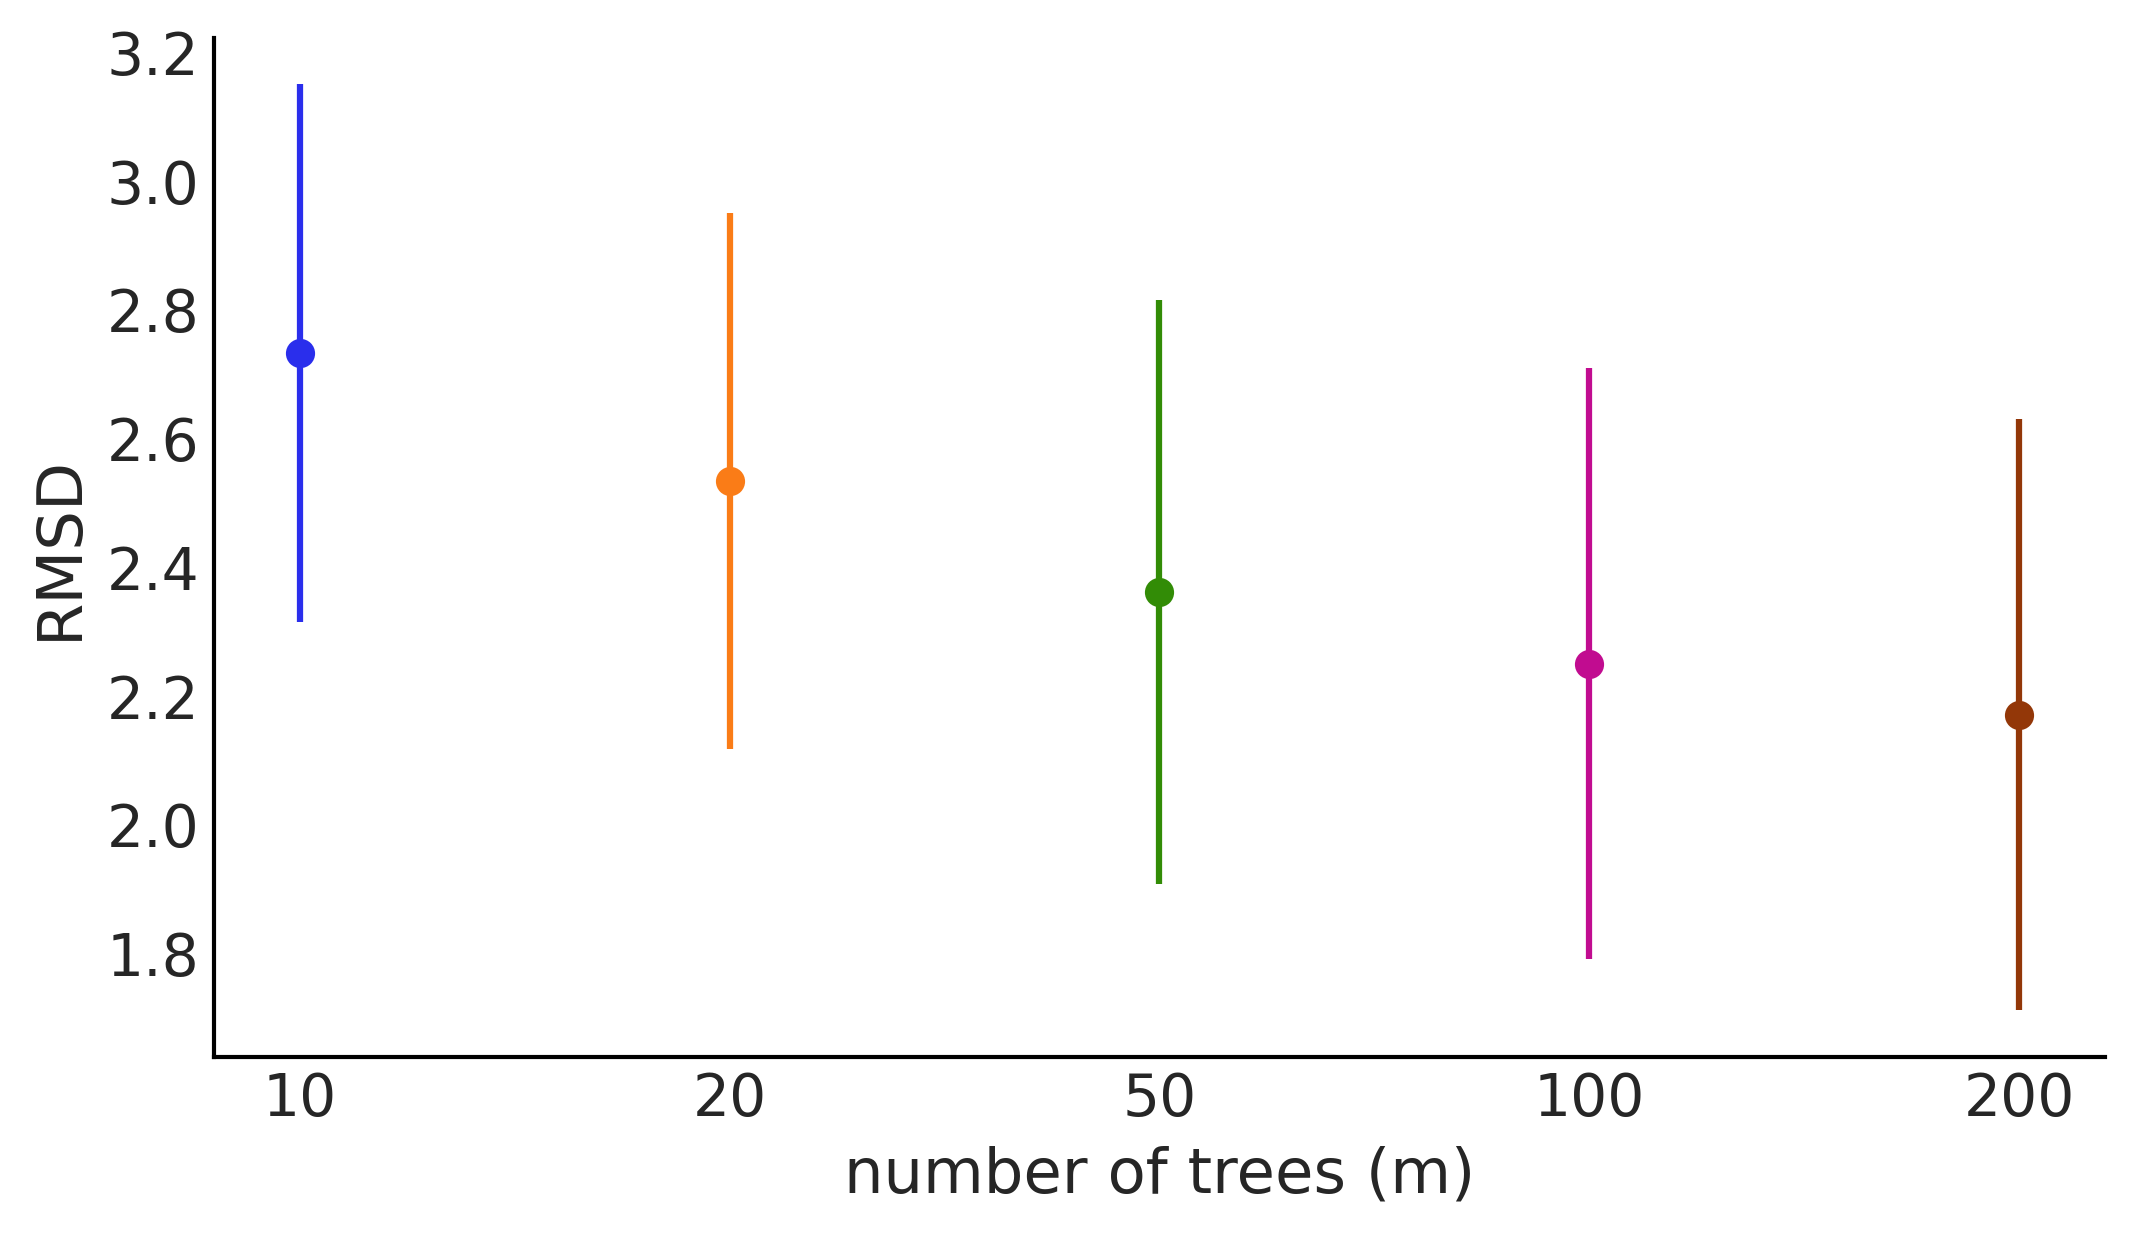

In [6]:
_, ax = plt.subplots(figsize=(7, 4))

for i, (k, v) in enumerate(cv_scores.items()):
    ax.errorbar(i, v[0], v[1], fmt="o")

ax.set_ylabel("RMSD")
ax.set_xticks(range(len(ms)))
ax.set_xticklabels(ms)
ax.set_xlabel("number of trees (m)");